# Uncertainty of 1D Field Data

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pylab as plt
%matplotlib inline 

import sys

print('Matplotlib Version: ' + mpl.__version__)
print('NumPy Version: ' + np.version.full_version)
print('Python Version: ' + sys.version)

import datetime
now  = datetime.datetime.now().isoformat()
print('Ran on ' + now)

Matplotlib Version: 3.1.3
NumPy Version: 1.18.1
Python Version: 3.7.7 (default, Mar 26 2020, 10:32:53) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
Ran on 2020-06-09T15:40:20.298861


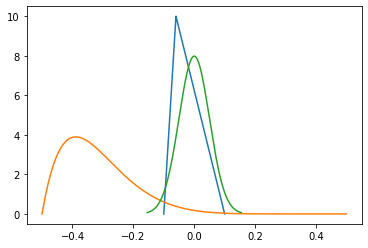

In [2]:
## Aside. Plotting scipy.stats objects
import scipy.stats
tri = scipy.stats.triang(0.2,loc=-0.1,scale=0.2)
beta = scipy.stats.beta(a=2,b=9,loc=-0.5)
norm = scipy.stats.norm(scale=0.05)

def rv_plot(rv,ax=None,**kwargs):
    if ax is None:
        ax = plt.gca()
    
    x = rv.ppf(np.linspace(0,1,1000)) # Space by the actual distribution
    if not np.isfinite(x[0]):
        x = x[1:]
    if not np.isfinite(x[-1]):
        x = x[:-1]
        
    x = np.union1d(x,np.linspace(x[0],x[-1],len(x)//3)) # Use a linear spacing too. Looks better
    
    ax.plot(x,rv.pdf(x),**kwargs)
rv_plot(tri)
rv_plot(beta)
rv_plot(norm)

In [3]:
x = np.linspace(-np.pi,np.pi,100)

np.random.seed(1)

N = 500
_x = np.tile(x,(N,1)).T
f = np.sin(_x + beta.rvs(size=N) + norm.rvs(size=N)*_x**2 ) + tri.rvs(size=N) 
print(f.shape)

(100, 500)


## Plot them all

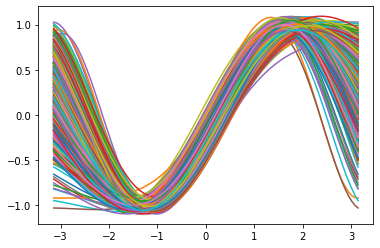

In [4]:
# Simple call, default colors
plt.plot(x,f);

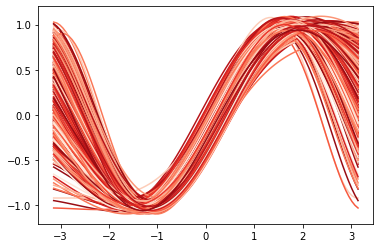

In [5]:
from cycler import cycler
ax = plt.gca()

colors = plt.cm.Reds(np.linspace(0.1
                                 ,0.9,10))

ax.set_prop_cycle(cycler(color=colors))
ax.plot(x,f);


The following is not strictly needed but helps. It's from 

In [6]:
def pretty_colorbar(pcm_obj,fig=None,ax=None,size="5%",pad=0.05):
    """
    Create a nicer color bar on the side of the plot
    
    Inputs:
        pcm_obj : the  `ax.pcolormesh` object
        fig     :   [`plt.gcf()`] The matplotlib figure
        ax      :   [`plt.gca()`] The matplotlib axis
        size    :   ["5%"] size of the colorbar
        pad     :   [0.05] The padding
    
    Returns:
        cbar    :   fig.colorbar object
        
    Tips:
        Set the scale in the `pcolormesh` but you can set the ticks with:
            
            cbar.set_ticks(np.linspace(-1,2.2,6))
    """
    if fig is None:
        fig = plt.gcf()
    if ax is None:
        ax = plt.gca()
    
    from mpl_toolkits.axes_grid1 import make_axes_locatable
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size=size, pad=pad)
    cbar = fig.colorbar(pcm_obj,cax=cax)
    return cbar

## Plot Types

There are two basic type of plots: continious and discrete. Both are done about the same way

Text(0.5, 1.0, 'Percentiles')

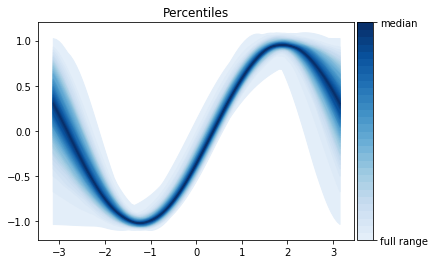

In [7]:
ptiles = np.linspace(0,0.5,30) # Note: You can do this to 0.01 instead of starting at 0

colors = plt.cm.Blues(np.linspace(0.1,1,len(ptiles))) # Start at 0.1 so it's not all white. 
fig,ax = plt.subplots()

for ii,ptile in enumerate(ptiles):
    a,b = np.percentile(f,[100*ptile,100-100*ptile],axis=1)
    ax.fill_between(x,a,b,color=colors[ii])

pcf = ax.pcolormesh([[]],vmin=0,vmax=1,cmap=mpl.colors.ListedColormap(colors))
cbar = pretty_colorbar(pcf)
cbar.set_ticks([0,1])
cbar.set_ticklabels(['full range','median'])
ax.set_title('Percentiles')

Text(0.5, 1.0, 'Percentiles')

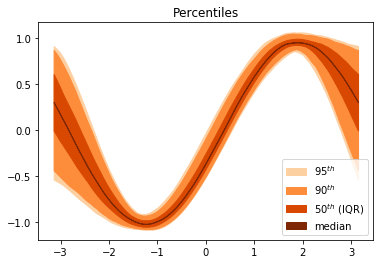

In [8]:
ptiles = [0.025,0.05,0.25,0.5]
labels = ['95$^{th}$','90$^{th}$','50$^{th}$ (IQR)','median']

colors = plt.cm.Oranges(np.linspace(0.25,1,len(ptiles))) # Start at 0.1 so it's not all white. 
fig,ax = plt.subplots()

for ii,ptile in enumerate(ptiles):
    a,b = np.percentile(f,[100*ptile,100-100*ptile],axis=1)
    ax.fill_between(x,a,b,color=colors[ii],label=labels[ii])

# pcf = ax.pcolormesh([[]],vmin=0,vmax=1,cmap=mpl.colors.ListedColormap(colors))
# cbar = pretty_colorbar(pcf)
# cbar.set_ticks([0,1])
# cbar.set_ticklabels(['full range','median'])
ax.legend(loc='lower right')

ax.set_title('Percentiles')

Text(0.5, 1.0, 'Standard Deviations')

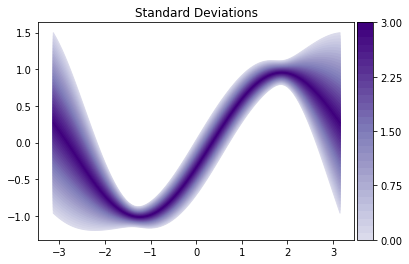

In [9]:
mean = np.mean(f,axis=1)
sig = np.std(f,axis=1,ddof=1)

scales = np.linspace(0,3,30)[::-1] # Note: You can do this to 0.01 instead of starting at 0

colors = plt.cm.Purples(np.linspace(0.25,1,len(scales)))
fig,ax = plt.subplots()

for ii,scale in enumerate(scales):
    ax.fill_between(x,mean-scale*sig,mean+scale*sig,
                    color=colors[ii])

pcf = ax.pcolormesh([[]],vmin=0,vmax=max(scales),cmap=mpl.colors.ListedColormap(colors))
cbar = pretty_colorbar(pcf)
cbar.set_ticks(np.linspace(0,max(scales),5))
#cbar.set_ticklabels(['0',max(scales)])

ax.set_title('Standard Deviations')

Text(0.5, 1.0, 'Standard Deviations')

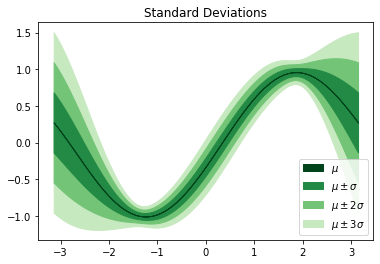

In [10]:
mean = np.mean(f,axis=1)
sig = np.std(f,axis=1,ddof=1)

nsig = 3

colors = plt.cm.Greens(np.linspace(0.25,1,nsig+1))[::-1]
fig,ax = plt.subplots()

for isig in range(nsig+1):
    if isig == 0:
        label = r'$\mu$'
    elif isig == 1:
         label = r'$\mu \pm \sigma$'
    else:
        label = fr'$\mu \pm {isig}\sigma$'
    ax.fill_between(x,mean-isig*sig,mean+isig*sig,
                    color=colors[isig],label=label,
                    zorder=-isig) #use zorder to control overwrite

ax.legend(loc='lower right')

ax.set_title('Standard Deviations')